In [1]:
import pandas as pd
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import numpy as np
import ast
import json

In [2]:
# Open your CSVs as a dataframes
    
with open('all_econ_data.csv', newline='\n', encoding='utf-8-sig') as a:
    all_econ_data = pd.read_csv(a)
    
with open('zcta_map/resources/zip_data.csv', newline='\n', encoding='utf-8-sig') as b:
    zip_data = pd.read_csv(b)
    
with open('hcprovider_data/doctor_geo.csv', newline='\n', encoding='utf-8-sig') as c:
    doctor_geo = pd.read_csv(c)
    
with open('hcprovider_data/hospital_geo.csv', newline='\n', encoding='utf-8-sig') as d:
    hospital_geo = pd.read_csv(d)

with open('insurance_data/insurance_data.csv', encoding='utf-8') as e:
    ins_data = pd.read_csv(e)

In [3]:
all_econ_data.head()

,Zip Code,Total Population,Labor Force Participation Rate,Unemployment Rate,Per Capita Income,"Total households - Less than $10,000","Total households - \$10,000-$14,999","Total households - \$15,000-$24,999","Total households - \$25,000-$34,999","Total households - \$35,000-$49,999",...,"Total households - \$75,000-$99,999","Total households - \$100,000-$149,999","Total households - \$150,000-$199,999","Total households - \$200,000 or more",Total Households,Median Income by Household,Total Families,Median Income by Families,Total Nonfamily Households,Median Income by Nonfamily Households
0,20001,41692,73,5,54353.0,1730,885,1302,876,1072,...,1710,3765,2191,3475,18764,100447,6040,113317,12724,93786
1,20002,52867,72,6,49452.0,2501,1163,1559,1504,2142,...,2894,4720,2729,3704,26217,82022,10665,101998,15552,69683
2,20003,26330,71,5,63600.0,686,367,456,352,417,...,1496,2566,1840,2852,12394,118607,5296,167746,7098,94339
3,20004,1610,88,4,117432.0,48,8,9,20,63,...,102,329,166,339,1163,144583,280,248672,883,135189
4,20005,12311,84,2,76658.0,751,212,304,425,446,...,1292,1602,839,1318,8172,94506,1668,142821,6504,83333


In [4]:
zip_data.head()

,zip,city,county,median_household_income,population,feature,area,density,nml_dens,nml_inc,color_key
0,20001,"Washington, DC",District Of Columbia,100447.0,41692,"{'type': 'Feature', 'geometry': {'type': 'Poly...",5.835524,7144.516970,0.759751,0.386274,#0062ce
1,20002,"Washington, DC",District Of Columbia,82022.0,52867,"{'type': 'Feature', 'geometry': {'type': 'Poly...",14.228399,3715.597280,0.964587,0.284281,#0048db
2,20003,"Washington, DC",District Of Columbia,118607.0,26330,"{'type': 'Feature', 'geometry': {'type': 'Poly...",6.447784,4083.573672,0.478169,0.486800,#007cc1
3,20004,"Washington, DC",District Of Columbia,144583.0,1610,"{'type': 'Feature', 'geometry': {'type': 'Mult...",0.904905,1779.192084,0.025057,0.630593,#00a1ae
4,20005,"Washington, DC",District Of Columbia,94506.0,12311,"{'type': 'Feature', 'geometry': {'type': 'Poly...",1.122787,10964.678013,0.221204,0.353387,#005ad2


In [5]:
doctor_geo.head()

,Unnamed: 0,lat,lng,name,vicinity,placeid,zip
0,0,38.917568,-77.020726,Howard University Hospital:pulmonary,"2041 Georgia Avenue Northwest, Washington",ChIJf2TW1OS3t4kRmYwM_D3YU9g,20001
1,1,38.905311,-77.012765,"Shiban Raina, MD","128 M Street Northwest #050, Washington",ChIJqVHvjcHHt4kR9bkSKfeYk6M,20001
2,2,38.905363,-77.018377,Aziz Salim MD,"2175 K Street Northwest, Washington",ChIJO7BERbS3t4kRdCq1JjRVF9c,20001
3,3,38.910311,-77.021587,Abramson Randi C MD,"1525 7th Street Northwest, Washington",ChIJNcEa_fG3t4kROr29e7EFZJw,20001
4,4,38.910311,-77.021587,"Hope Ferdowsian, MD, MPH","1525 7th Street Northwest, Washington",ChIJxfO-cZTJt4kR1eicxoihlSc,20001


In [6]:
ins_data.head()

,GEO.id2,GEO.id2.1,HC03_VC131
0,0,Id2,Percent; HEALTH INSURANCE COVERAGE - Civilian ...
1,1,20001,96.0
2,2,20002,95.4
3,3,20003,97.6
4,4,20004,98.7


In [7]:
dr_grpby = doctor_geo[['placeid','zip']].groupby('zip')
dr_df = pd.DataFrame(dr_grpby.count())

hos_grpby = hospital_geo[['placeid','zip']].groupby('zip')
hos_df = pd.DataFrame(hos_grpby.count())

In [8]:
dr_df.head()

,placeid
zip,
20001,32
20002,58
20003,49
20004,14
20005,20


In [9]:
hos_df.head()

,placeid
zip,
20001,11
20002,8
20003,8
20004,5
20005,6


In [10]:
ins_data1 = ins_data.drop(0).rename(index=str, columns={"GEO.id2.1": "zip", "HC03_VC131": "Percent Insured"}).drop(['GEO.id2'], axis=1)

ins_data1.head()

,zip,Percent Insured
1,20001,96.0
2,20002,95.4
3,20003,97.6
4,20004,98.7
5,20005,95.5


In [11]:
all_econ_data = all_econ_data.rename(index=str, columns={'Zip Code': 'zip'})

all_econ_data.head()

,zip,Total Population,Labor Force Participation Rate,Unemployment Rate,Per Capita Income,"Total households - Less than $10,000","Total households - \$10,000-$14,999","Total households - \$15,000-$24,999","Total households - \$25,000-$34,999","Total households - \$35,000-$49,999",...,"Total households - \$75,000-$99,999","Total households - \$100,000-$149,999","Total households - \$150,000-$199,999","Total households - \$200,000 or more",Total Households,Median Income by Household,Total Families,Median Income by Families,Total Nonfamily Households,Median Income by Nonfamily Households
0,20001,41692,73,5,54353.0,1730,885,1302,876,1072,...,1710,3765,2191,3475,18764,100447,6040,113317,12724,93786
1,20002,52867,72,6,49452.0,2501,1163,1559,1504,2142,...,2894,4720,2729,3704,26217,82022,10665,101998,15552,69683
2,20003,26330,71,5,63600.0,686,367,456,352,417,...,1496,2566,1840,2852,12394,118607,5296,167746,7098,94339
3,20004,1610,88,4,117432.0,48,8,9,20,63,...,102,329,166,339,1163,144583,280,248672,883,135189
4,20005,12311,84,2,76658.0,751,212,304,425,446,...,1292,1602,839,1318,8172,94506,1668,142821,6504,83333


In [12]:
econ_select = all_econ_data[['zip', 'Total Population', 'Unemployment Rate', 'Per Capita Income']]

econ_select.head()

,zip,Total Population,Unemployment Rate,Per Capita Income
0,20001,41692,5,54353.0
1,20002,52867,6,49452.0
2,20003,26330,5,63600.0
3,20004,1610,4,117432.0
4,20005,12311,2,76658.0


In [13]:
ins_data2 = ins_data1
ins_data2['Percent Insured'] = ins_data2['Percent Insured'].replace('-',0)
ins_data2 = ins_data2.astype({'zip': 'int64', 'Percent Insured':'float64'})

ins_data2.head()

,zip,Percent Insured
1,20001,96.0
2,20002,95.4
3,20003,97.6
4,20004,98.7
5,20005,95.5


In [14]:
econ_select1 = econ_select.merge(ins_data2, on='zip', how='inner')

econ_select1.head()

,zip,Total Population,Unemployment Rate,Per Capita Income,Percent Insured
0,20001,41692,5,54353.0,96.0
1,20002,52867,6,49452.0,95.4
2,20003,26330,5,63600.0,97.6
3,20004,1610,4,117432.0,98.7
4,20005,12311,2,76658.0,95.5


In [15]:
econ_select2 = econ_select1.merge(hos_df, on='zip', how='left')
econ_select2 = econ_select2.rename(index=str, columns={'placeid': 'hospital facilities'})
econ_select2 = pd.DataFrame(econ_select2)

econ_select2.head()

,zip,Total Population,Unemployment Rate,Per Capita Income,Percent Insured,hospital facilities
0,20001,41692,5,54353.0,96.0,11.0
1,20002,52867,6,49452.0,95.4,8.0
2,20003,26330,5,63600.0,97.6,8.0
3,20004,1610,4,117432.0,98.7,5.0
4,20005,12311,2,76658.0,95.5,6.0


In [16]:
econ_select3 = econ_select2.merge(dr_df, on='zip', how='left')
econ_select3 = econ_select3.rename(index=str, columns={'placeid': 'doctors'})
econ_select3 = pd.DataFrame(econ_select3)

econ_select3.head()

,zip,Total Population,Unemployment Rate,Per Capita Income,Percent Insured,hospital facilities,doctors
0,20001,41692,5,54353.0,96.0,11.0,32.0
1,20002,52867,6,49452.0,95.4,8.0,58.0
2,20003,26330,5,63600.0,97.6,8.0,49.0
3,20004,1610,4,117432.0,98.7,5.0,14.0
4,20005,12311,2,76658.0,95.5,6.0,20.0


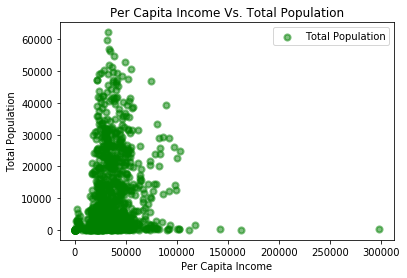

In [17]:
plt.scatter(econ_select3["Per Capita Income"], econ_select3["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Total Population")
plt.xlabel("Per Capita Income")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

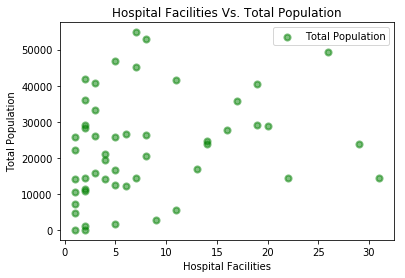

In [18]:
plt.scatter(econ_select3["hospital facilities"], econ_select3["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Hospital Facilities Vs. Total Population")
plt.xlabel("Hospital Facilities")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

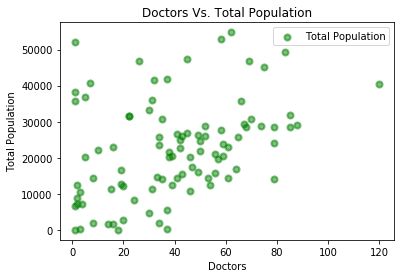

In [19]:
plt.scatter(econ_select3["doctors"], econ_select3["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Doctors Vs. Total Population")
plt.xlabel("Doctors")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.savefig("Doctors_Vs_Total_Population.png")

plt.show()

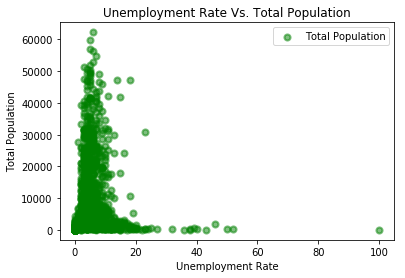

In [20]:
plt.scatter(econ_select3["Unemployment Rate"], econ_select3["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Unemployment Rate Vs. Total Population")
plt.xlabel("Unemployment Rate")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

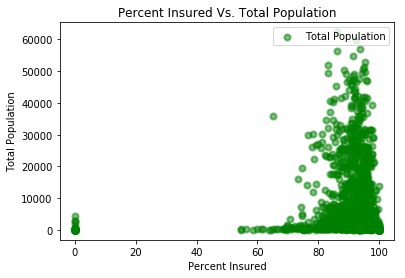

In [21]:
plt.scatter(econ_select3["Percent Insured"], econ_select3["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Percent Insured Vs. Total Population")
plt.xlabel("Percent Insured")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

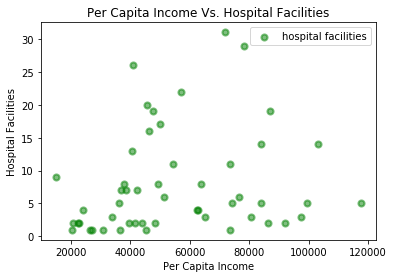

In [22]:
plt.scatter(econ_select3["Per Capita Income"], econ_select3["hospital facilities"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Hospital Facilities")
plt.xlabel("Per Capita Income")
plt.ylabel("Hospital Facilities")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Hospital_Facilities.png")

plt.show()

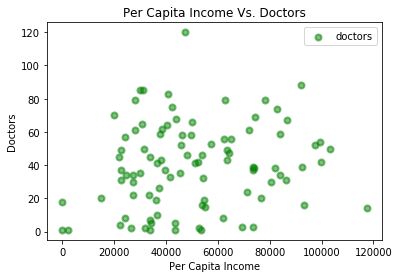

In [23]:
plt.scatter(econ_select3["Per Capita Income"], econ_select3["doctors"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Doctors")
plt.xlabel("Per Capita Income")
plt.ylabel("Doctors")

plt.legend(loc= "upper right")

plt.show()

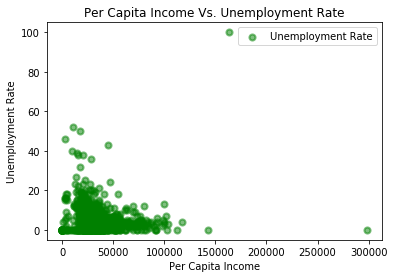

In [24]:
plt.scatter(econ_select3["Per Capita Income"], econ_select3["Unemployment Rate"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Unemployment Rate")
plt.xlabel("Per Capita Income")
plt.ylabel("Unemployment Rate")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Unemployment_Rate.png")

plt.show()

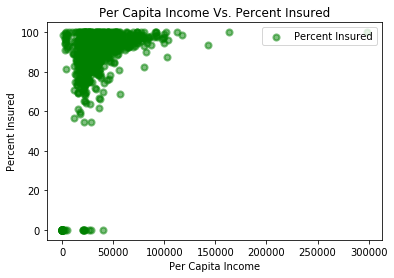

In [25]:
plt.scatter(econ_select3["Per Capita Income"], econ_select3["Percent Insured"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Percent Insured")
plt.xlabel("Per Capita Income")
plt.ylabel("Percent Insured")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Percent_Insured.png")

plt.show()